Milestone 1: Data Collection and Preprocessing


In [128]:
# importing all the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [129]:
# Loading the data files
patients = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\patients.csv")
admissions = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\admissions.csv")
icustays = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\icustays.csv")
prescriptions = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\prescriptions.csv")
omr = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\omr.csv")
inputevents = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\inputevents.csv")
outputevents = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\outputevents.csv")
labevents = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\labevents.csv")
chartevents = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\chartevents.csv")
d_icd = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\d_icd_diagnoses.csv")
d_items = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\d_items.csv")
d_labitems = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\d_labitems.csv")


Key Takeaway:

This gives the data needed to extract vitals, labs, medical history.

In [130]:
#Reading the tables from files
tables = {
    "patients": patients,
    "admissions": admissions,
    "icustays": icustays,
    "prescriptions": prescriptions,
    "omr": omr,
    "inputevents": inputevents,
    "outputevents": outputevents,
    "labevents": labevents,
    "chartevents": chartevents
}

for name, df in tables.items():
    print("\n---", name.upper(), "---")
    print("Rows, Columns:", df.shape)
    print(df.head(3))
    print(df.info())



--- PATIENTS ---
Rows, Columns: (100, 6)
   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0    10014729      F          21         2125       2011 - 2013         NaN
1    10003400      F          72         2134       2011 - 2013  2137-09-02
2    10002428      F          80         2155       2011 - 2013         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subject_id         100 non-null    int64 
 1   gender             100 non-null    object
 2   anchor_age         100 non-null    int64 
 3   anchor_year        100 non-null    int64 
 4   anchor_year_group  100 non-null    object
 5   dod                31 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.8+ KB
None

--- ADMISSIONS ---
Rows, Columns: (275, 16)
   subject_id   hadm_id            admittime            dischtime deathtime

Key Takeaway:

This gives a full overview of size, structure, and data types in each dataset. Helps us understand where patient vitals, labs, prescriptions, and ICU events come from.

In [131]:
#Relationship between tables

# patients and admissions
print(admissions[['subject_id','hadm_id']].head())

# admissions and icustays
print(icustays[['subject_id','hadm_id','stay_id']].head())

# linking labs to admissions
print(labevents[['subject_id','hadm_id','itemid']].head())

# linking vitals to ICU stays
print(chartevents[['subject_id','hadm_id','itemid']].head())

   subject_id   hadm_id
0    10004235  24181354
1    10009628  25926192
2    10018081  23983182
3    10006053  22942076
4    10031404  21606243
   subject_id   hadm_id   stay_id
0    10018328  23786647  31269608
1    10020187  24104168  37509585
2    10020187  26842957  32554129
3    10012853  27882036  31338022
4    10020740  25826145  32145159
   subject_id     hadm_id  itemid
0    10014354  29600294.0   51277
1    10014354  29600294.0   51279
2    10014354  29600294.0   52172
3    10014354  29600294.0   51301
4    10014354  29600294.0   51249
   subject_id   hadm_id  itemid
0    10005817  20626031  225054
1    10005817  20626031  223769
2    10005817  20626031  223956
3    10005817  20626031  224866
4    10005817  20626031  227341


Key Takeaway:

-> This tells the relationship or link between the files and how they create a chain.
-> This is essential to merge information for generating medical-aware diet plans.

In [132]:
#identifying missing values and data

for name, df in tables.items():
    print("\nMissing values in:", name)
    print(df.isnull().sum())


Missing values in: patients
subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
dtype: int64

Missing values in: admissions
subject_id                0
hadm_id                   0
admittime                 0
dischtime                 0
deathtime               260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64

Missing values in: icustays
subject_id        0
hadm_id           0
stay_id           0
first_careunit    0
last_careunit     0
intime            0
outtime           0
los               0
dtype: int64

Missing values in: prescriptions
subject_id               0
hadm_id                  0
pharmacy_id              0
poe_i

Key Takeaway:

->identified missing values.
->This shows which tables need careful cleaning before ML

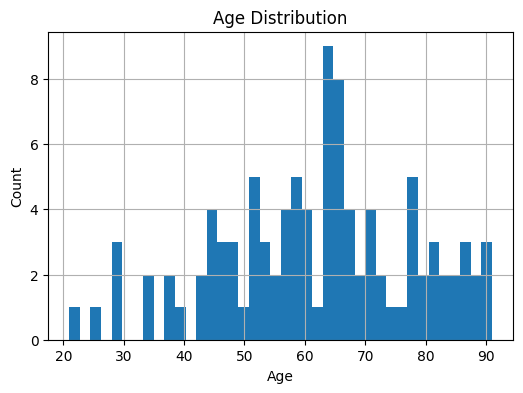

In [133]:
# Analyzing the feature and its importance

# Age distribution from patients tables
plt.figure(figsize=(6,4))
patients['anchor_age'].hist(bins=40)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Key Takeaway:

->It is one of the most important factor for consideration while planning diet chart.
->Most patients are middle-aged or older (i.e.between 60 and 70)
->Age distribution is critical for analyzing risk factors and health trends.

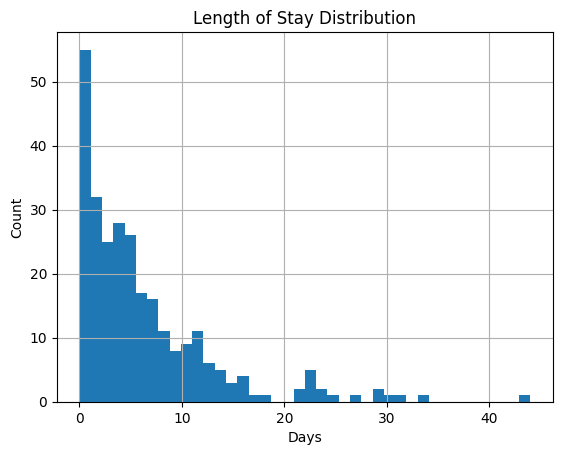

In [134]:
#length of stay
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['length_of_stay_days'] = (admissions['dischtime'] - admissions['admittime']).dt.days

admissions['length_of_stay_days'].hist(bins=40)
plt.title("Length of Stay Distribution")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

Key Takeaway:

->Most ICU patients stay for only a few days (1–3 days).
->Long stays (10+ days) are rare but present.
->The plot is right-skewed, meaning a small number of patients need long-term ICU care.

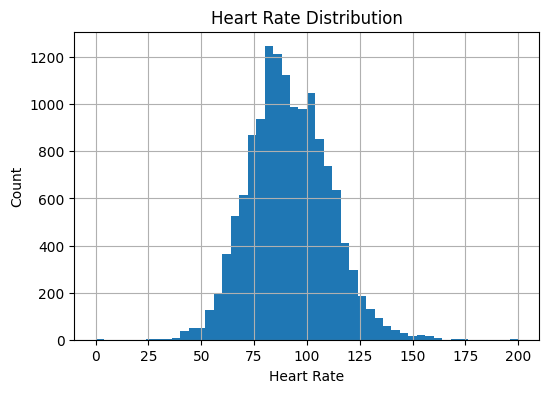

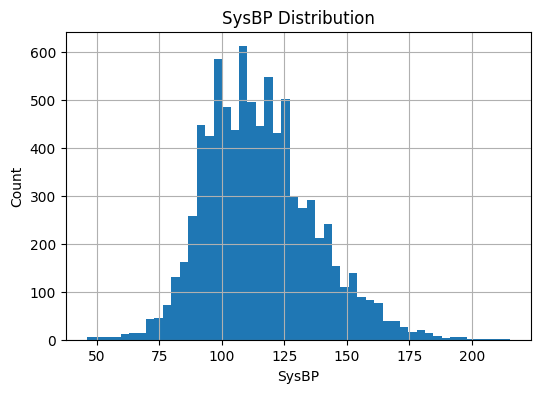

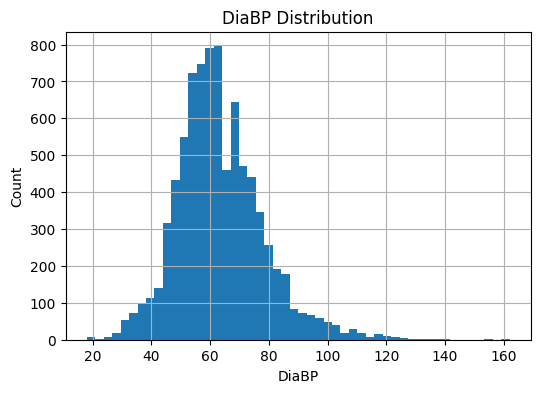

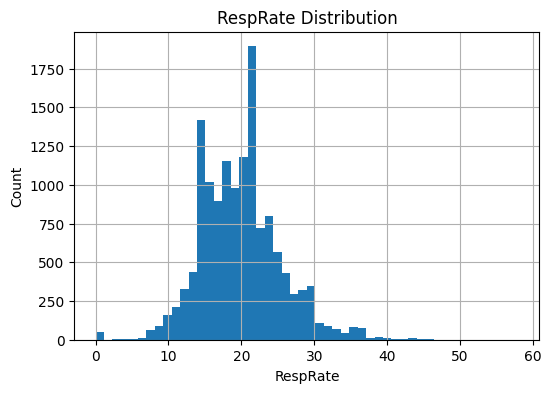

In [135]:
# distribution plot of vitals
vital_ids = {
    "Heart Rate": 220045,
    "SysBP": 220179,
    "DiaBP": 220180,
    "RespRate": 220210
}

sample = chartevents[chartevents['itemid'].isin(vital_ids.values())]

for name, item in vital_ids.items():
    plt.figure(figsize=(6,4))
    sample[sample['itemid']==item]['valuenum'].dropna().hist(bins=50)
    plt.title(f"{name} Distribution")
    plt.xlabel(name)
    plt.ylabel("Count")
    plt.show()

Key Takeaway:

-> This tells at what range the vitals fall into.
-> Important for AI-NutriCare because abnormal vitals (high BP, high HR) often require diet modifications.

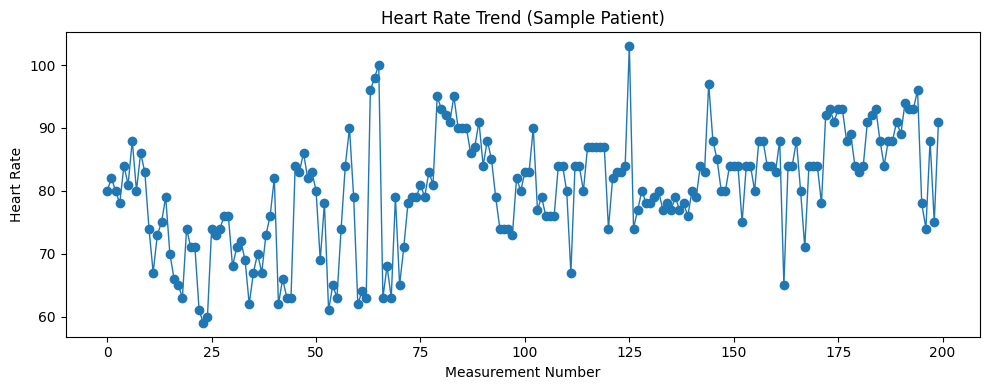

In [136]:
#plotting sample time-series data for Heart Rate


# Filter heart rate values
hr_data = chartevents[chartevents['itemid'] == 220045].dropna().head(200)

# Reset index so it becomes a timeline
hr_data = hr_data.reset_index(drop=True)

# Simple plot
plt.figure(figsize=(10,4))
plt.plot(hr_data.index, hr_data['valuenum'], marker='o', linewidth=1)
plt.title("Heart Rate Trend (Sample Patient)")
plt.xlabel("Measurement Number")
plt.ylabel("Heart Rate")
plt.tight_layout()
plt.show()

Key Takeaway:

-> Shows how vitals fluctuate over time.
-> This helps model to understand patient instability or stress, which has dietary implications.

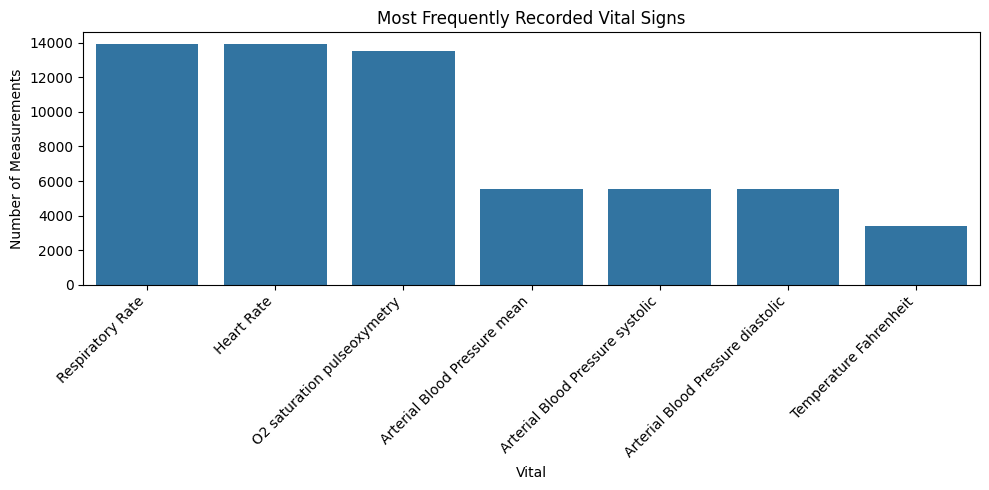

In [137]:

# plotting most vital measurements

# List of vital sign itemids
vital_ids = [
    220045, 211,        # Heart Rate
    220210, 618,        # Respiratory Rate
    220277,             # SpO2
    223761,             # Temperature
    220050,             # BP Systolic
    220051,             # BP Diastolic
    220052              # MAP
]

# Filter chartevents to only these vitals
vitals_df = chartevents[chartevents['itemid'].isin(vital_ids)]

# Count most measured vitals
top_items = vitals_df['itemid'].value_counts().reset_index()
top_items.columns = ['itemid', 'count']

# Merge names from d_items
top_items = top_items.merge(d_items[['itemid','label']], on='itemid', how='left')

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='label', y='count', data=top_items)
plt.xticks(rotation=45, ha='right')
plt.title("Most Frequently Recorded Vital Signs")
plt.xlabel("Vital")
plt.ylabel("Number of Measurements")
plt.tight_layout()
plt.show()


Key Takeaway:

-> this shows the most frequently recorded vital signs.

In [138]:
# identifying important icu vitals

# Filter for common ICU vitals based on itemid knowledge
important_vitals_ids = [220045, 220179, 220180, 220210, 220277, 223761, 220052]
# HR, SysBP, DiaBP, RespRate, SpO2, Temp, MAP
important_vitals = chartevents[chartevents['itemid'].isin(important_vitals_ids)]
important_vitals.head()


,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
37,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220210,19,19.0,insp/min,0.0
65,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220052,58,58.0,mmHg,0.0
69,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220045,80,80.0,bpm,0.0
92,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220277,95,95.0,%,0.0
102,10005817,20626031,32604416,6770.0,2132-12-16 01:00:00,2132-12-16 01:04:00,220045,82,82.0,bpm,0.0


Key Takeaways:

These are the vitals continuously monitored in ICU and relevant for diet planning.

In [139]:

# mapping item_id to variable names

# Merge with d_items to get labels
important_vitals = important_vitals.merge(d_items[['itemid','label']], on='itemid', how='left')
important_vitals.head()


,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning,label
0,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220210,19,19.0,insp/min,0.0,Respiratory Rate
1,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220052,58,58.0,mmHg,0.0,Arterial Blood Pressure mean
2,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220045,80,80.0,bpm,0.0,Heart Rate
3,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-16 00:02:00,220277,95,95.0,%,0.0,O2 saturation pulseoxymetry
4,10005817,20626031,32604416,6770.0,2132-12-16 01:00:00,2132-12-16 01:04:00,220045,82,82.0,bpm,0.0,Heart Rate



Key Takeaway:
-> gives variable names for the id.

In [140]:
# selecting important variables for model

model_data = important_vitals[['subject_id', 'hadm_id', 'stay_id', 'charttime', 'label', 'valuenum']]
model_data = model_data.dropna(subset=['valuenum'])
model_data.head()

,subject_id,hadm_id,stay_id,charttime,label,valuenum
0,10005817,20626031,32604416,2132-12-16 00:00:00,Respiratory Rate,19.0
1,10005817,20626031,32604416,2132-12-16 00:00:00,Arterial Blood Pressure mean,58.0
2,10005817,20626031,32604416,2132-12-16 00:00:00,Heart Rate,80.0
3,10005817,20626031,32604416,2132-12-16 00:00:00,O2 saturation pulseoxymetry,95.0
4,10005817,20626031,32604416,2132-12-16 01:00:00,Heart Rate,82.0


Key Takeaway:

-> Only keep patient ID, ICU stay ID, time, variable, and value for easy understanding
-> helps to prepare clean table for time-series modeling.

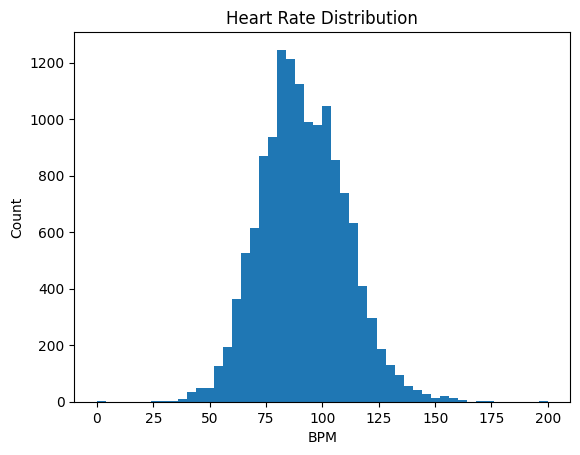

In [141]:
# plotting distributions and sample time-series data

import matplotlib.pyplot as plt

# Heart Rate
hr = model_data[model_data['label'] == 'Heart Rate']['valuenum']
plt.hist(hr, bins=50)
plt.title("Heart Rate Distribution")
plt.xlabel("BPM")
plt.ylabel("Count")
plt.show()


Key Takeaway:

-> Shows normal ranges vs outliers
-> Helps detect abnormal patterns for model robustness

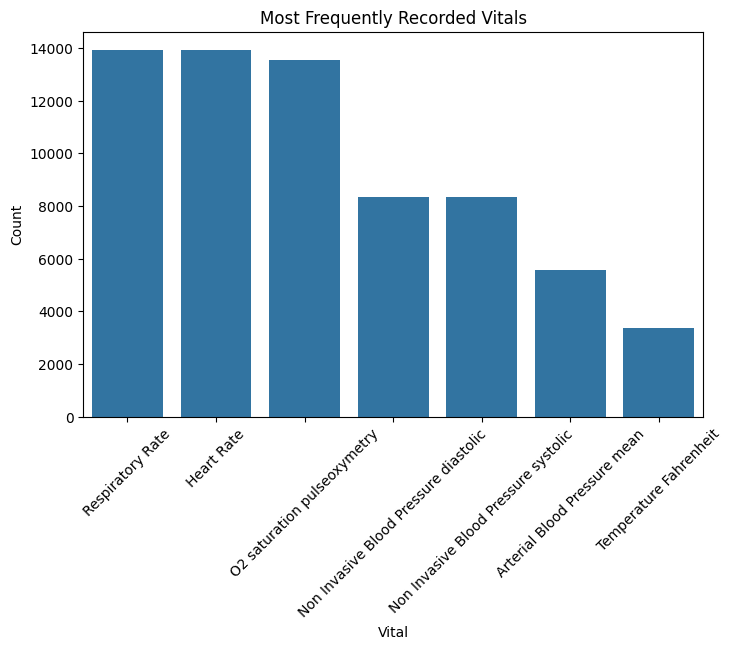

In [142]:
# most frequent vital measuremnts
top_items = model_data['label'].value_counts().head(10).reset_index()
top_items.columns = ['Vital', 'Count']

import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='Vital', y='Count', data=top_items)
plt.xticks(rotation=45)
plt.title("Most Frequently Recorded Vitals")
plt.show()

Key Takeaway:

-> Shows which vitals are most frequently measured

In [143]:
# Selecting Final Vital Variables for Modeling
final_vitals = model_data[model_data['label'].isin([
    'Heart Rate','RespRate','SpO2','Temp','MAP'
])]
final_vitals.head()

,subject_id,hadm_id,stay_id,charttime,label,valuenum
2,10005817,20626031,32604416,2132-12-16 00:00:00,Heart Rate,80.0
4,10005817,20626031,32604416,2132-12-16 01:00:00,Heart Rate,82.0
9,10005817,20626031,32604416,2132-12-16 02:00:00,Heart Rate,80.0
14,10005817,20626031,32604416,2132-12-16 03:00:00,Heart Rate,78.0
18,10005817,20626031,32604416,2132-12-16 04:00:00,Heart Rate,84.0


Key Takeaway:

-> Ensures only useful and complete features are used for predictive modeling


Available ICU vitals for plotting: ['RespRate' 'Heart Rate' 'SpO2' 'MAP' 'Temp']


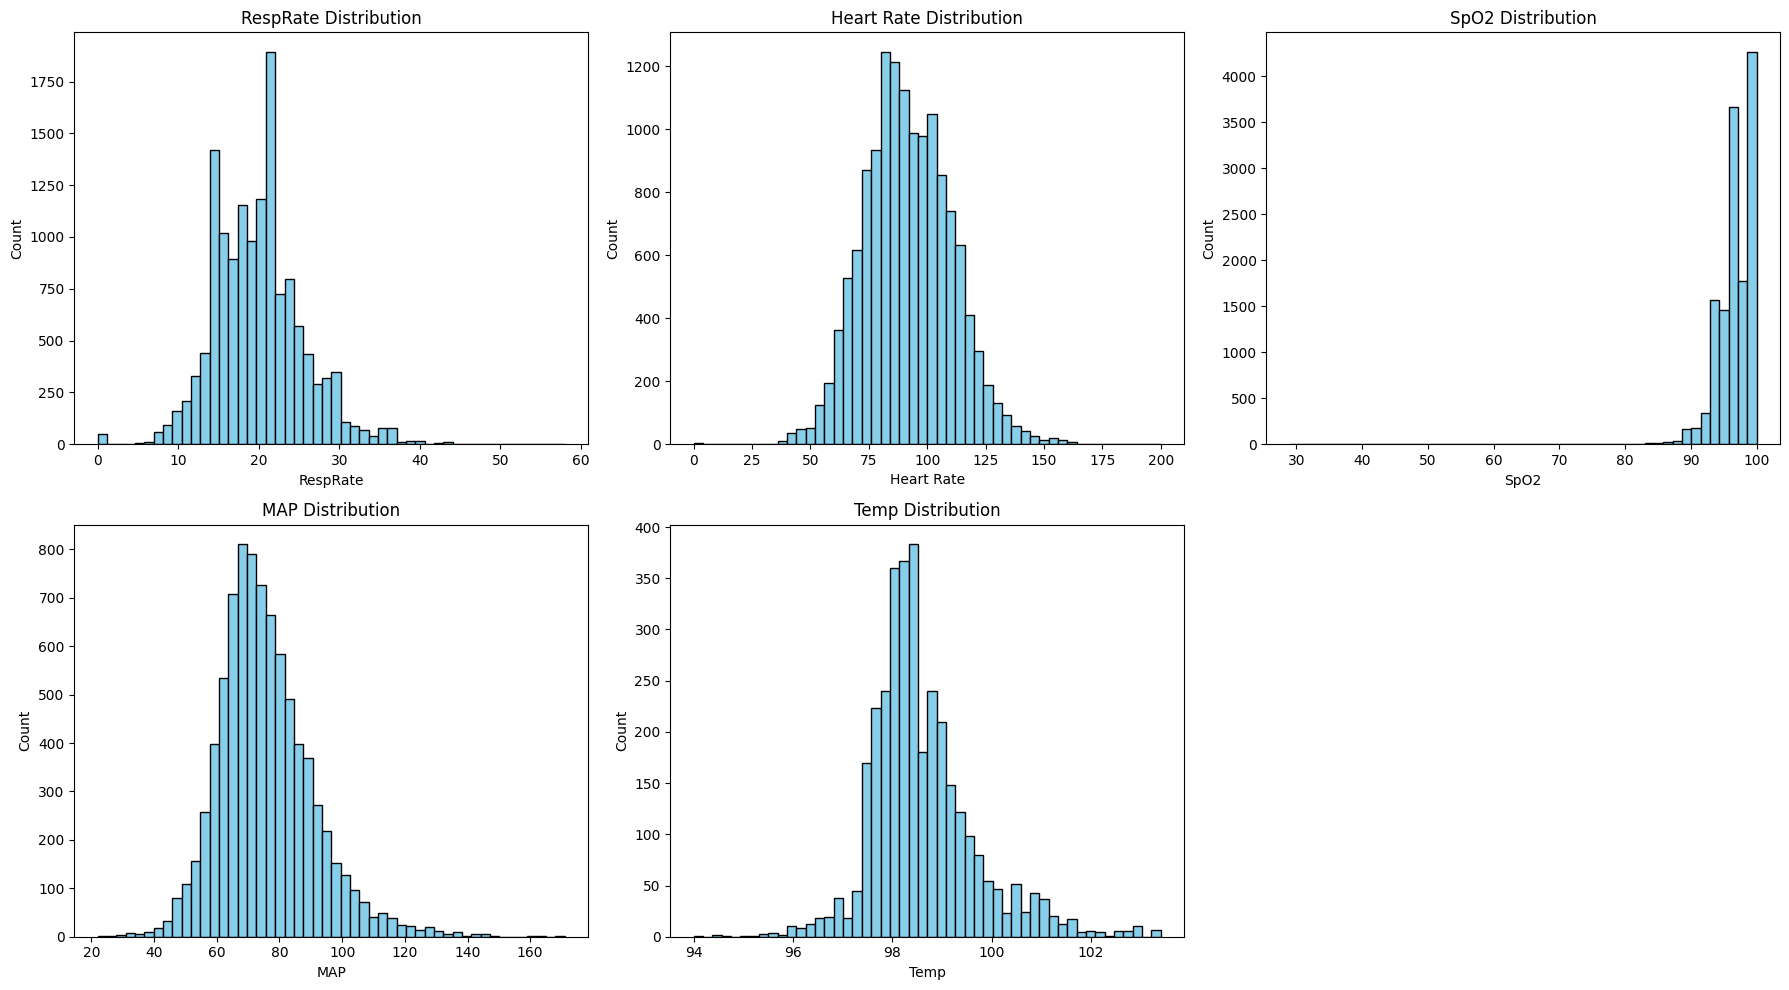

In [144]:

# distribution plot of all vitals

icu_vitals = {
    'Heart Rate': 220045,
    'MAP': 220181,
    'RespRate': 220210,
    'SpO2': 220277,
    'Temp': 223761
}

# Merge chartevents with d_items to get label names (if not already mapped)
vitals = chartevents.merge(d_items[['itemid','label']], on='itemid', how='left')

# Keep only ICU vital itemids
final_vitals = vitals[vitals['itemid'].isin(icu_vitals.values())].copy()

# Map itemid to our predefined labels to standardize
final_vitals['label'] = final_vitals['itemid'].map({v:k for k,v in icu_vitals.items()})

# Drop missing numeric values
final_vitals = final_vitals.dropna(subset=['valuenum'])

available_vitals = final_vitals['label'].unique()
print("Available ICU vitals for plotting:", available_vitals)

import math
num_vitals = len(available_vitals)
cols = 3
rows = math.ceil(num_vitals / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 5*rows))
axes = axes.flatten()

for i, vital in enumerate(available_vitals):
    data = final_vitals[final_vitals['label']==vital]['valuenum']
    axes[i].hist(data, bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{vital} Distribution")
    axes[i].set_xlabel(vital)
    axes[i].set_ylabel("Count")

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [145]:
# Count number of measurements per icustay
icu_counts = final_vitals.groupby('stay_id')['valuenum'].count()
good_icus = icu_counts[icu_counts > 50].index  # keep ICUs with >50 measurements

filtered_vitals = final_vitals[final_vitals['stay_id'].isin(good_icus)]
print(filtered_vitals.head())

     subject_id   hadm_id   stay_id  caregiver_id            charttime  \
37     10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
69     10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
92     10005817  20626031  32604416        6770.0  2132-12-16 00:00:00   
102    10005817  20626031  32604416        6770.0  2132-12-16 01:00:00   
104    10005817  20626031  32604416        6770.0  2132-12-16 01:00:00   

               storetime  itemid value  valuenum  valueuom  warning  \
37   2132-12-16 00:02:00  220210    19      19.0  insp/min      0.0   
69   2132-12-16 00:02:00  220045    80      80.0       bpm      0.0   
92   2132-12-16 00:02:00  220277    95      95.0         %      0.0   
102  2132-12-16 01:04:00  220045    82      82.0       bpm      0.0   
104  2132-12-16 01:04:00  220277    96      96.0         %      0.0   

          label  
37     RespRate  
69   Heart Rate  
92         SpO2  
102  Heart Rate  
104        SpO2  


Key Takeaway:

-> Only ICU stays with adequate measurement data are retained, improving the reliability and usability of the dataset for analysis and modeling.


C:\Users\mouni\AppData\Local\Temp\ipykernel_22712\1356632884.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hr_hourly_ffill = hr_hourly.fillna(method='ffill')
C:\Users\mouni\AppData\Local\Temp\ipykernel_22712\1356632884.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hr_hourly_filled = hr_hourly_ffill.fillna(method='bfill')


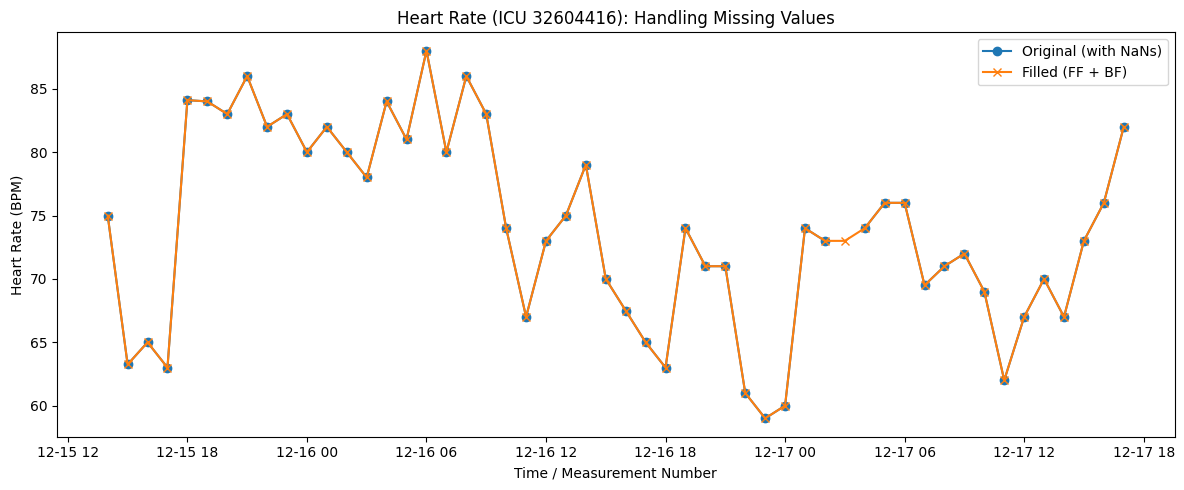

In [146]:
# resampling to hourly bins

# Pick a sample ICU stay with Heart Rate data
hr_icus = filtered_vitals[filtered_vitals['label']=='Heart Rate']['stay_id'].unique()
if len(hr_icus) == 0:
    print("No Heart Rate data available!")
else:
    sample_icu_id = hr_icus[0]

    # Select data for this ICU stay
    hr_sample = filtered_vitals[(filtered_vitals['stay_id']==sample_icu_id) &
                                (filtered_vitals['label']=='Heart Rate')].copy()

    if 'charttime' in hr_sample.columns:
        # Use charttime
        hr_sample['charttime'] = pd.to_datetime(hr_sample['charttime'])
        hr_sample = hr_sample.sort_values('charttime')
        hr_sample.set_index('charttime', inplace=True)

        # Resample hourly
        hr_hourly = hr_sample['valuenum'].resample('1h').mean()
    else:

        hr_hourly = hr_sample['valuenum'].reset_index(drop=True)

    # Check if data exists after resampling
    if len(hr_hourly) == 0:
        print("No data to plot after resampling!")
    else:
        # Forward fill missing values
        hr_hourly_ffill = hr_hourly.fillna(method='ffill')
        # Backward fill remaining missing
        hr_hourly_filled = hr_hourly_ffill.fillna(method='bfill')

        # Plot
        plt.figure(figsize=(12,5))
        plt.plot(hr_hourly.index, hr_hourly.values, marker='o', linestyle='-', label='Original (with NaNs)')
        plt.plot(hr_hourly_filled.index, hr_hourly_filled.values, marker='x', linestyle='-', label='Filled (FF + BF)')
        plt.title(f"Heart Rate (ICU {sample_icu_id}): Handling Missing Values")
        plt.xlabel("Time / Measurement Number")
        plt.ylabel("Heart Rate (BPM)")
        plt.legend()
        plt.tight_layout()
        plt.show()


key takeaway:
-> Blue line shows original heart rate data with gaps; orange line is the filled, model-ready data.
-> Spikes and dips reflect sudden changes due to activity, medication, or noise.
-> Missing values are handled using forward fill and backward fill.


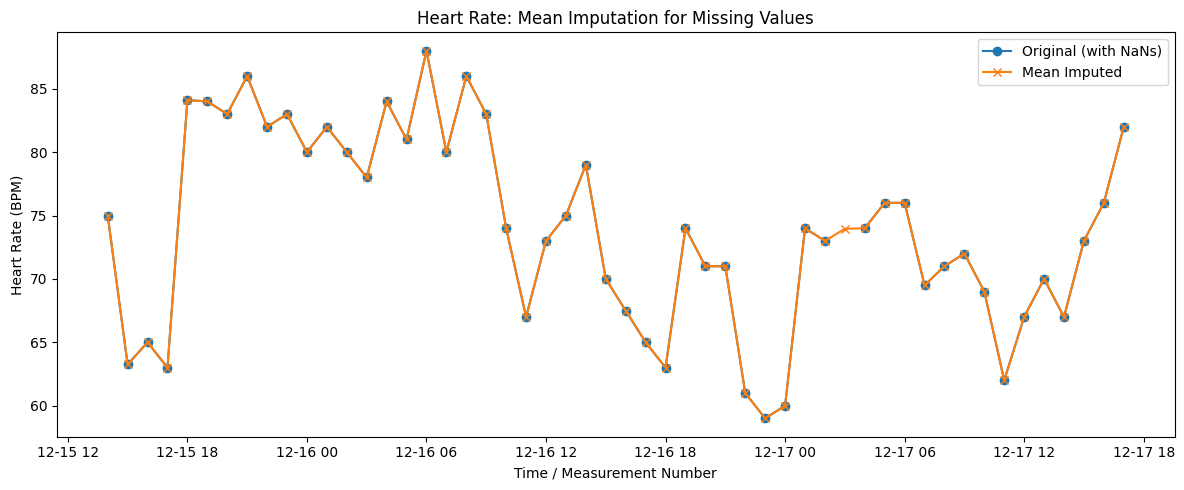

In [147]:
# Mean Imputation
# hr_hourly-  resampled hourly Heart Rate Series

# Compute mean ignoring NaNs
hr_mean = hr_hourly.mean()

# Replace missing values with mean
hr_mean_filled = hr_hourly.fillna(hr_mean)

# Visualization
plt.figure(figsize=(12,5))
plt.plot(hr_hourly.index, hr_hourly.values, marker='o', linestyle='-', label='Original (with NaNs)')
plt.plot(hr_mean_filled.index, hr_mean_filled.values, marker='x', linestyle='-', label='Mean Imputed')
plt.title("Heart Rate: Mean Imputation for Missing Values")
plt.xlabel("Time / Measurement Number")
plt.ylabel("Heart Rate (BPM)")
plt.legend()
plt.tight_layout()
plt.show()


Key Takeaway:

-> Simple imputation method — replaces missing data with a neutral value (mean).
-> Smooths gaps, but may slightly flatten trends

In [148]:
# Use the selected vital itemids

# mapping: itemid -> vital name
vital_names = {
    220045: 'Heart Rate',
    220210: 'RespRate',
    227242: 'SpO2',
    223761: 'Temp',
    220181:  'MAP',
}

# Filter only selected vitals
selected_vitals = final_vitals[final_vitals['itemid'].isin(vital_names.keys())].copy()

# Ensure charttime is datetime
selected_vitals['charttime'] = pd.to_datetime(selected_vitals['charttime'])

Key Takeaway:

-> data is reduced to only selected vitals

In [149]:
# extract multiple variables for each icu stay
# List of unique ICU stays
icu_stays = selected_vitals['stay_id'].unique()


In [150]:
# build 24 hour time-series for each vital
def build_hourly_matrix_for_stay(stay_id, vitals_df, vital_names):
    df = vitals_df[vitals_df['stay_id'] == stay_id].copy()
    if df.empty:
        return None

    df.set_index('charttime', inplace=True)

    # Create hourly bins (24 hours from first measurement)
    start_time = df.index.min().replace(minute=0, second=0, microsecond=0)
    hourly_index = pd.date_range(start=start_time, periods=24, freq='h')
    hourly_df = pd.DataFrame(index=hourly_index)

    # For each vital
    for itemid, name in vital_names.items():
        vital_series = df[df['itemid'] == itemid]['valuenum']
        if vital_series.empty:
            hourly_df[name] = np.nan
        else:
            hourly_df[name] = vital_series.resample('h').mean()

    # Impute missing values
    hourly_df = hourly_df.ffill().bfill().fillna(hourly_df.mean())

    return hourly_df


Key Takeaway:

-> Each ICU stay now has a 24×F matrix where missing hours are imputed.
-> Rows = hours 0–23, Columns = selected vitals.


In [151]:
# build matrices for all icu stays
matrices = []
stay_ids = []

for stay_id in icu_stays:
    mat = build_hourly_matrix_for_stay(stay_id, selected_vitals, vital_names)
    if mat is not None and mat.shape == (24, len(vital_names)):
        matrices.append(mat.values.astype(np.float32))
        stay_ids.append(stay_id)

# Stack into one 3D array
X_vitals = np.stack(matrices)  # shape = (number of ICU stays, 24 hours, number of vitals)
print("X.shape =", X_vitals.shape)

X.shape = (140, 24, 5)


Key Takeaways:
-> 140 = no. of ICU stays
-> 24 = 24 hours
-> 5 = no. of vitals

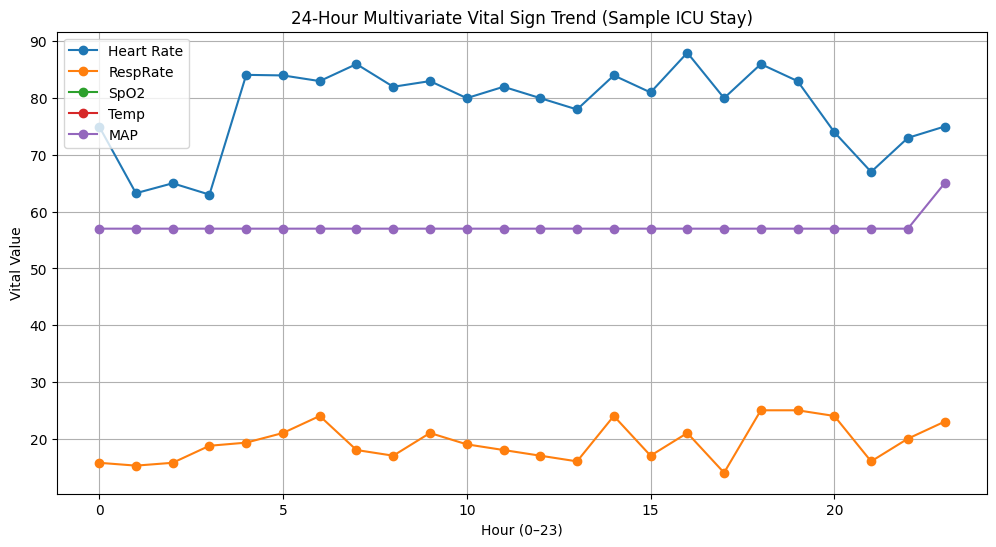

In [152]:
# Pick first valid sample
sample = X_vitals[0]  # shape (24, F)

plt.figure(figsize=(12,6))
for i, name in enumerate(vital_names.values()):
    plt.plot(range(24), sample[:, i], marker='o', label=name)

plt.title("24-Hour Multivariate Vital Sign Trend (Sample ICU Stay)")
plt.xlabel("Hour (0–23)")
plt.ylabel("Vital Value")
plt.legend()
plt.grid(True)
plt.show()


Key takeaways:
-> X-axis shows 24 ICU hours; Y-axis represents vital values like HR, BP, and respiration.
-> Each colored line tracks a different vital and its changes over time.
->Spikes, dips, and flat lines reflect patient condition, stability, or filled missing data.

In [153]:

#important lab itemids
lab_itemids = {
    "Glucose": 50931,        # Blood sugar → carb planning
    "Creatinine": 50912,     # Kidney → protein & fluid intake
    "Urea (BUN)": 51006,     # Protein metabolism
    "Sodium": 50983,         # Electrolyte balance
    "Potassium": 50971,      # Heart & muscle function
    "Hemoglobin": 51222,     # Anemia → iron intake
    "WBC": 51300,            # Infection / inflammation
    "Lactate": 50813,        # Metabolic stress
    "pH" : 52041,
    "Cholestrol": 50907

}


key takeaways:
-> ICU datasets include hundreds of lab tests.
-> Only clinically meaningful and frequently measured labs are selected for analysis.


In [154]:
# Filter only selected important labs
important_labs = labevents[labevents['itemid'].isin(lab_itemids.values())]

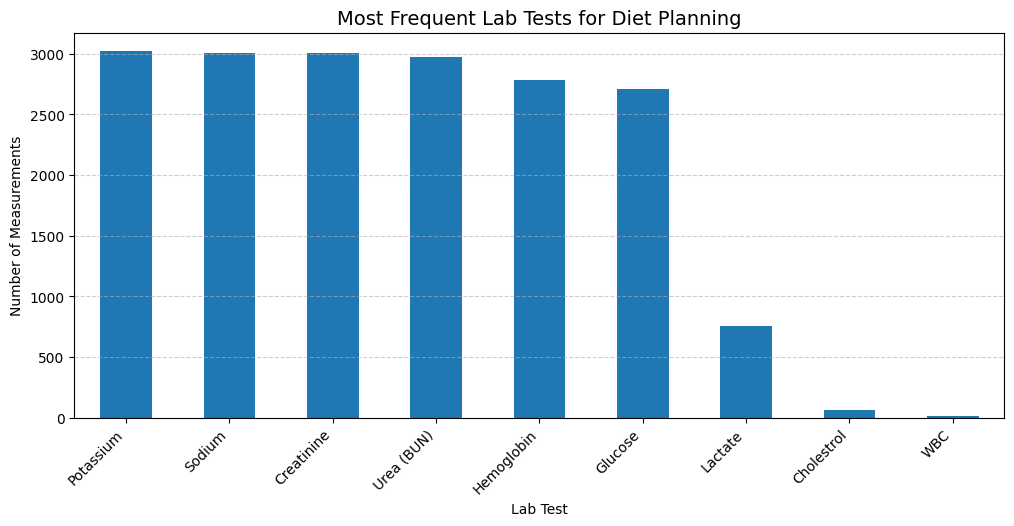

In [155]:
# Count number of measurements per lab itemid
lab_counts = important_labs['itemid'].value_counts()

# Reverse mapping: itemid -> lab name
itemid_to_lab = {v: k for k, v in lab_itemids.items()}

# Convert itemids to readable lab names
lab_counts.index = lab_counts.index.map(itemid_to_lab)

# Plot most frequent lab tests
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
lab_counts.sort_values(ascending=False).plot(kind='bar')

plt.title("Most Frequent Lab Tests for Diet Planning", fontsize=14)
plt.xlabel("Lab Test")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

     


In [156]:
# filter lab events
labs = labevents[labevents['itemid'].isin(lab_itemids.values())].copy()
labs['charttime'] = pd.to_datetime(labs['charttime'])


key takeaway:
-> Filters out labs that are not clinically relevant.
-> Converts time columns to datetime format for proper resampling.

In [157]:
# lab frequency
lab_counts = labs['itemid'].value_counts()
lab_counts

itemid
50971    3022
50983    3007
50912    3003
51006    2974
51222    2787
50931    2711
50813     758
50907      61
51300      16
Name: count, dtype: int64

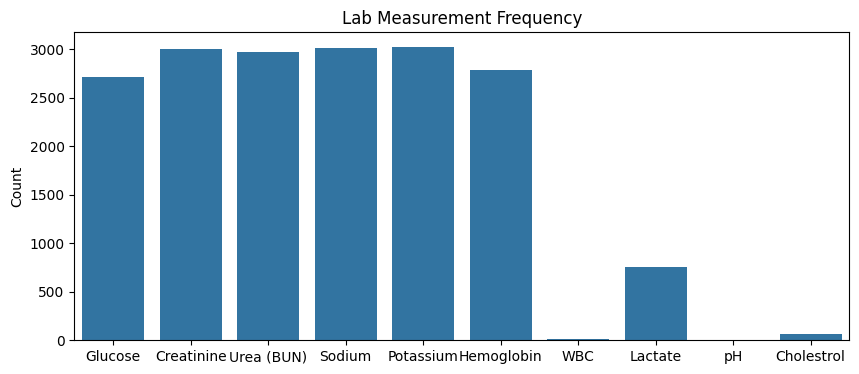

In [158]:
# Bar plot of lab availability
plt.figure(figsize=(10,4))
sns.barplot(
    x=[k for k in lab_itemids.keys()],
    y=[lab_counts.get(v, 0) for v in lab_itemids.values()]
)
plt.title("Lab Measurement Frequency")
plt.ylabel("Count")
plt.show()

key takeaways:
-> Identifies which lab tests are reliable and usable.
-> Drops labs with very low observation counts.

In [159]:
# Extract 24-Hour Lab Time-Series for One Stay
def extract_24h_labs(stay_id, labs, lab_itemids):
    stay_labs = labs[labs['stay_id'] == stay_id]
    if stay_labs.empty:
        return None

    start_time = stay_labs['charttime'].min()
    end_time = start_time + pd.Timedelta(hours=24)

    stay_labs = stay_labs[
        (stay_labs['charttime'] >= start_time) &
        (stay_labs['charttime'] < end_time)
    ]

    hourly_index = pd.date_range(start=start_time, periods=24, freq='h')
    lab_df = pd.DataFrame(index=hourly_index)

    for name, itemid in lab_itemids.items():
        series = stay_labs[stay_labs['itemid'] == itemid]
        if not series.empty:
            s = series.set_index('charttime')['valuenum']
            lab_df[name] = s.resample('h').mean()
        else:
            lab_df[name] = np.nan

    return lab_df

Key Takeaways:
-> Converts irregular lab timestamps into hourly aligned data.
-> Produces a 24 × F lab feature matrix.

In [160]:
# columns
print(labevents.columns)
print(icustays.columns)


Index(['labevent_id', 'subject_id', 'hadm_id', 'specimen_id', 'itemid',
       'order_provider_id', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments'],
      dtype='object')
Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los'],
      dtype='object')


In [161]:
# merging labs and icustays
labs = labevents.merge(
    icustays[['stay_id', 'hadm_id', 'intime', 'outtime']],
    on='hadm_id',
    how='inner'
)

In [162]:
# labs tested during icu stay
labs['charttime'] = pd.to_datetime(labs['charttime'])
labs['intime'] = pd.to_datetime(labs['intime'])
labs['outtime'] = pd.to_datetime(labs['outtime'])

labs = labs[
    (labs['charttime'] >= labs['intime']) &
    (labs['charttime'] <= labs['outtime'])
]


In [163]:
# Loop Through All ICU Stays
lab_matrices = []
lab_stay_ids = []

for sid in icustays['stay_id'].unique():
    mat = extract_24h_labs(sid, labs, lab_itemids)
    if mat is not None and mat.shape == (24, len(lab_itemids)):
        lab_matrices.append(mat.values.astype(np.float32))
        lab_stay_ids.append(sid)

X_labs = np.stack(lab_matrices)
print("Lab matrix shape:", X_labs.shape)


Lab matrix shape: (139, 24, 10)


Key Takeaways:

-> 139 = no. of lab tests
-> 24 = 24 hours
-> 10 = no. of labs

In [164]:

labs_for_stay = labs[labs['stay_id'] == stay_id]
print(labs_for_stay[['itemid', 'charttime', 'valuenum']].head(10))


      itemid           charttime  valuenum
2699   51219 2153-03-28 12:00:00       NaN
2811   52033 2153-03-28 20:00:00       NaN
2812   50822 2153-03-28 20:00:00      3.50
2813   50824 2153-03-28 20:00:00    140.00
2814   50813 2153-03-28 20:00:00      3.70
2815   50820 2153-03-28 20:00:00      7.37
2816   50808 2153-03-28 20:00:00      1.16
7713   51484 2153-03-28 14:04:00       NaN
7714   51506 2153-03-28 14:04:00       NaN
7715   51491 2153-03-28 14:04:00      5.00


In [165]:
# Inspect one time lab series
lab_df_example = pd.DataFrame(
    X_labs[8],
    columns=lab_itemids.keys()
)
lab_df_example.head()


,Glucose,Creatinine,Urea (BUN),Sodium,Potassium,Hemoglobin,WBC,Lactate,pH,Cholestrol
0,NaN,NaN,NaN,145.0,4.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
labs_for_stay['itemid'].value_counts()

itemid
50813    6
52033    5
51222    5
51221    5
50971    4
        ..
50951    1
50828    1
50816    1
51873    1
51865    1
Name: count, Length: 100, dtype: int64

In [167]:
stay_id = labs['stay_id'].iloc[0]   # take one example stay
stay_labs = labs[labs['stay_id'] == stay_id]

In [168]:
LACTATE_ITEMID = 50813   # example itemid
lab = stay_labs[stay_labs['itemid'] == LACTATE_ITEMID]

lab['charttime'] = pd.to_datetime(lab['charttime'])
lab = lab.set_index('charttime')

     

C:\Users\mouni\AppData\Local\Temp\ipykernel_22712\3647121699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab['charttime'] = pd.to_datetime(lab['charttime'])


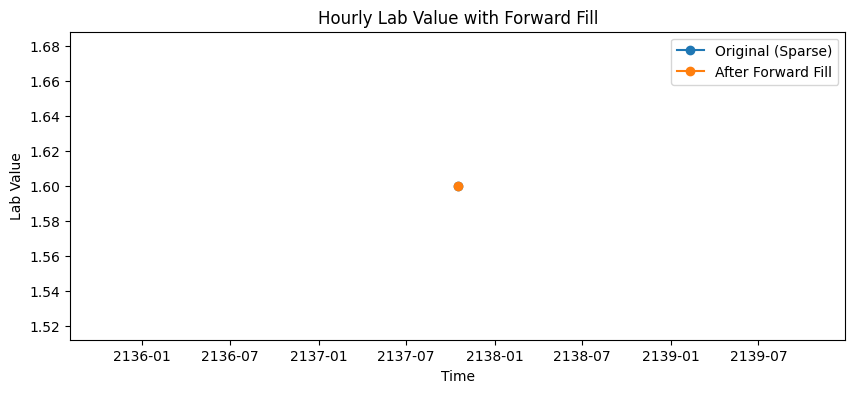

In [169]:
# resampling
labs_hourly = lab['valuenum'].resample('h').mean()
# filling missing values
labs_hourly_filled = labs_hourly.ffill()

plt.figure(figsize=(10,4))
plt.plot(labs_hourly, marker='o', label='Original (Sparse)')
plt.plot(labs_hourly_filled, marker='o', label='After Forward Fill')
plt.legend()
plt.title("Hourly Lab Value with Forward Fill")
plt.xlabel("Time")
plt.ylabel("Lab Value")
plt.show()

In [170]:
labs_filled = labs_hourly.ffill().bfill()

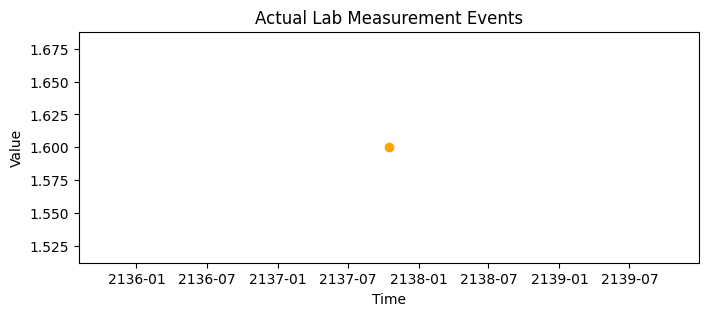

In [44]:
plt.figure(figsize=(8,3))
plt.scatter(lab.index, lab['valuenum'], color='orange')
plt.title("Actual Lab Measurement Events")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

key takeaway:
-> Only one actual lab measurement exists in the 24-hour window.
-> After resampling, just one hour contains a real value.
-> Forward-fill cannot work because there is no earlier measurement to propagate.

In [171]:
print(labs_hourly.dropna())

charttime
2137-10-16 02:00:00    1.6
Freq: h, Name: valuenum, dtype: float64


In [172]:
X_vitals   # shape (N, 24, V/F)
vital_names

{220045: 'Heart Rate',
 220210: 'RespRate',
 227242: 'SpO2',
 223761: 'Temp',
 220181: 'MAP'}

In [173]:
# Map ICU itemid → human-readable name
icu_itemid_to_name = dict(
    zip(d_items['itemid'], d_items['label'])
)


In [174]:
import numpy as np
X_vitals = []
stay_ids_vitals = []

for stay_id in icu_stays:
    mat = build_hourly_matrix_for_stay(stay_id, selected_vitals, vital_names)

    if mat is not None and mat.shape == (24, len(vital_names)):
        X_vitals.append(mat.values.astype(np.float32))
        stay_ids_vitals.append(stay_id)

X_vitals = np.stack(X_vitals)
print("Vitals shape:", X_vitals.shape)


Vitals shape: (140, 24, 5)


In [175]:
def build_hourly_lab_matrix_for_stay(stay_id, lab_itemids):
    """
    Builds a 24-hour hourly lab matrix for one ICU stay.
    Rows = hours (0–23)
    Columns = lab tests
    """
    # Filter labs for this ICU stay
    stay_labs = labs[labs['stay_id'] == stay_id].copy()
    if stay_labs.empty:
        return None

    # Get ICU start time
    intime = stay_labs['intime'].iloc[0]

    # Create hourly index (24 hours)
    hourly_index = pd.date_range(start=intime, periods=24, freq='h')
    hourly_df = pd.DataFrame(index=hourly_index)

    # Process each lab
    for lab_name, itemid in lab_itemids.items():
        lab_data = stay_labs[stay_labs['itemid'] == itemid].copy()
        if lab_data.empty:
            hourly_df[lab_name] = np.nan
            continue

        lab_data['charttime'] = pd.to_datetime(lab_data['charttime'])
        lab_data = lab_data.set_index('charttime')

        # Hourly mean
        lab_hourly = lab_data['valuenum'].resample('h').mean()

        # Align to 24-hour window
        hourly_df[lab_name] = lab_hourly.reindex(hourly_index)

    return hourly_df


In [176]:
X_labs = []
stay_ids_labs = []

for stay_id in icu_stays:
    mat = build_hourly_lab_matrix_for_stay(stay_id, lab_itemids)

    if mat is not None and mat.shape == (24, len(lab_itemids)):
        X_labs.append(mat.values.astype(np.float32))
        stay_ids_labs.append(stay_id)

X_labs = np.stack(X_labs)
print("Labs shape:", X_labs.shape)

Labs shape: (139, 24, 10)


In [51]:
common_stays = list(set(stay_ids_vitals).intersection(set(stay_ids_labs)))
print("Common ICU stays:", len(common_stays))


Common ICU stays: 139


In [177]:
idx_v = [stay_ids_vitals.index(s) for s in common_stays]
idx_l = [stay_ids_labs.index(s) for s in common_stays]

X_vitals_common = X_vitals[idx_v]
X_labs_common = X_labs[idx_l]


In [178]:
# combine vitals and lab
X_combined = np.concatenate([X_vitals_common, X_labs_common], axis=2)
print("Combined shape:", X_combined.shape)


Combined shape: (139, 24, 15)


Key Takeaways:
-> N = number of ICU stays with both vitals and labs (139)
-> 24 = hourly timeline
-> F = vitals + labs features (5+10)

In [179]:
print(vital_names)
print(lab_itemids)

{220045: 'Heart Rate', 220210: 'RespRate', 227242: 'SpO2', 223761: 'Temp', 220181: 'MAP'}
{'Glucose': 50931, 'Creatinine': 50912, 'Urea (BUN)': 51006, 'Sodium': 50983, 'Potassium': 50971, 'Hemoglobin': 51222, 'WBC': 51300, 'Lactate': 50813, 'pH': 52041, 'Cholestrol': 50907}


In [180]:
# Convert ICU vital itemids → human-readable names
vital_names_list = [
    icu_itemid_to_name.get(itemid, str(itemid))
    for itemid in vital_names.keys()
]

# Lab names are already readable
lab_names_list = list(lab_itemids.keys())

# Final feature names
feature_names = vital_names_list + lab_names_list
print(feature_names)
print(len(feature_names))

['Heart Rate', 'Respiratory Rate', 'Manual Blood Pressure Diastolic Right', 'Temperature Fahrenheit', 'Non Invasive Blood Pressure mean', 'Glucose', 'Creatinine', 'Urea (BUN)', 'Sodium', 'Potassium', 'Hemoglobin', 'WBC', 'Lactate', 'pH', 'Cholestrol']
15


In [181]:
# vital_names_clean = [
#     icu_itemid_to_name.get(itemid, str(itemid))
#     for itemid in selected_vital_itemids
# ]

# feature_names = vital_names_clean + lab_names
print(type(vital_names))
print(type(vital_names_list))
print(type(lab_names_list))
print(len(feature_names))


<class 'dict'>
<class 'list'>
<class 'list'>
15


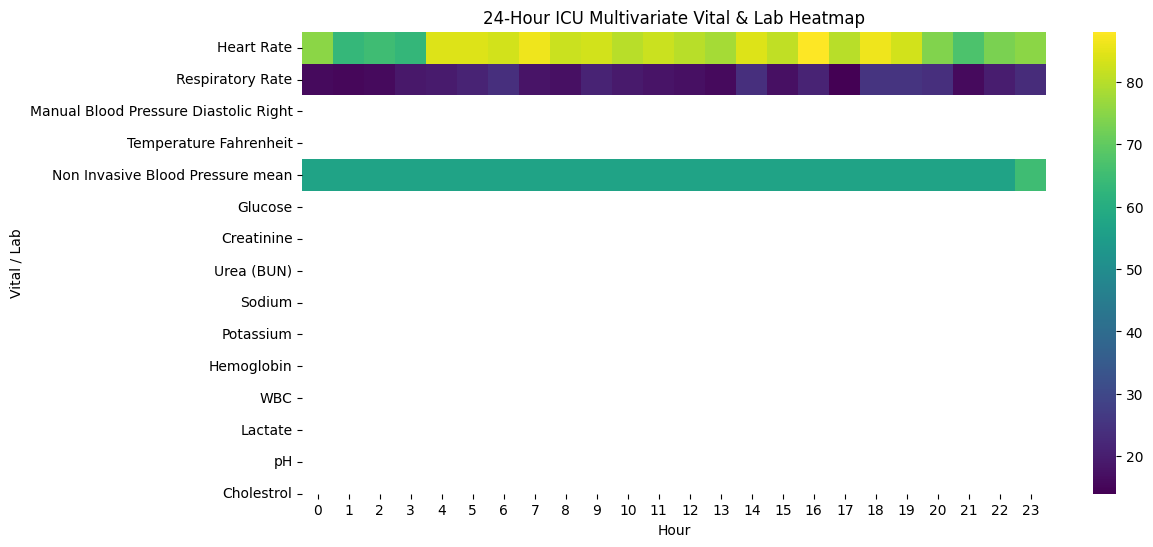

In [182]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(
    sample.T,
    cmap="viridis",
    xticklabels=range(24),
    yticklabels=feature_names
)

plt.title("24-Hour ICU Multivariate Vital & Lab Heatmap")
plt.xlabel("Hour")
plt.ylabel("Vital / Lab")
plt.show()

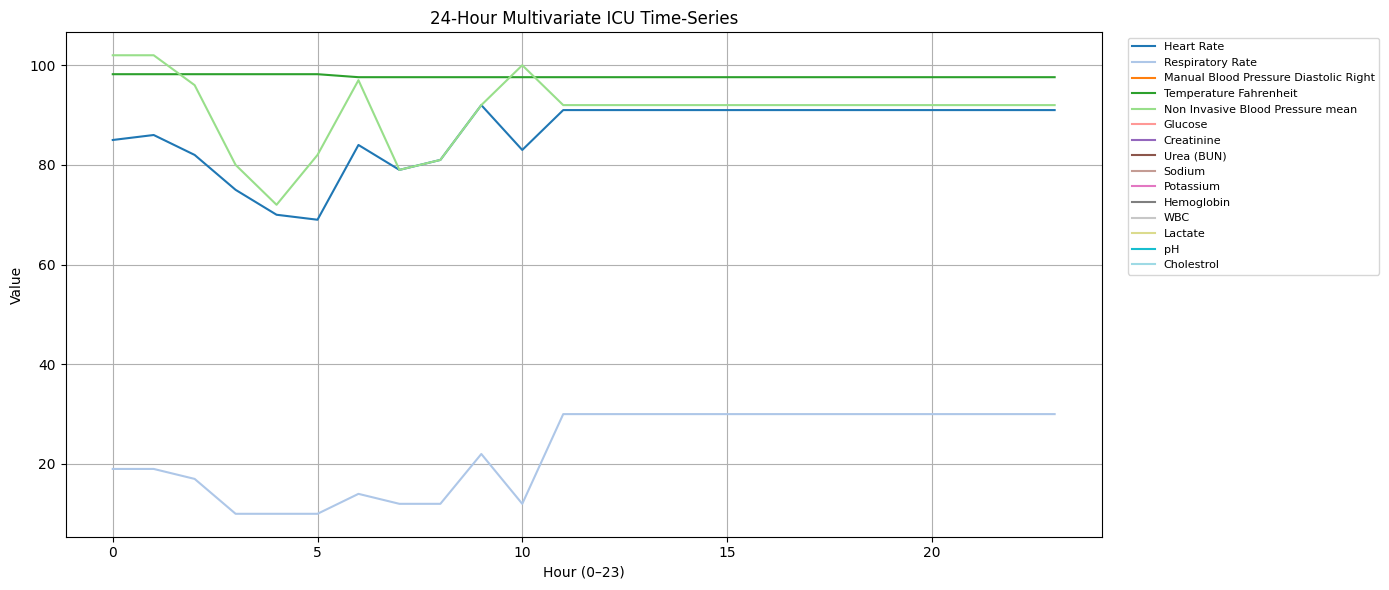

In [183]:
from matplotlib import cm

sample = X_combined[5]
num_features = sample.shape[1]

colors = cm.tab20(np.linspace(0, 1, num_features))

plt.figure(figsize=(14,6))

for i, name in enumerate(feature_names):
    plt.plot(sample[:, i], color=colors[i], label=name)

plt.title("24-Hour Multivariate ICU Time-Series")
plt.xlabel("Hour (0–23)")
plt.ylabel("Value")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [184]:
# save dataset
np.save("icu_timeseries.npy", X_combined)

pd.DataFrame(feature_names, columns=["feature"]).to_csv(
    "feature_names.csv", index=False
)


In [185]:
import pandas as pd
# Load and display the first few rows
features_df = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Notebooks\feature_names.csv")
features_df.describe()

,feature
count,15
unique,15
top,Heart Rate
freq,1


In [186]:
import numpy as np

X_loaded = np.load("icu_timeseries.npy")
print("Shape of saved data:", X_loaded.shape)

Shape of saved data: (139, 24, 15)


In [187]:
# Load previously saved vitals + labs
X_prev = np.load("icu_timeseries.npy")  # shape: (n_stays, 24, F)
feature_names_prev = pd.read_csv("feature_names.csv")["feature"].tolist()


In [188]:
inputevents.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
0,10005817,20626031,32604416,4793,2132-12-16 19:50:00,2132-12-16 19:51:00,2132-12-16 19:50:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
1,10005817,20626031,32604416,92805,2132-12-15 20:15:00,2132-12-15 20:16:00,2132-12-15 20:11:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
2,10005817,20626031,32604416,20310,2132-12-17 09:15:00,2132-12-17 09:16:00,2132-12-17 09:28:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
3,10005817,20626031,32604416,79166,2132-12-16 09:36:00,2132-12-16 09:37:00,2132-12-16 09:37:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
4,10005817,20626031,32604416,92805,2132-12-15 20:10:00,2132-12-15 21:10:00,2132-12-15 20:10:00,221456,2.0,grams,...,Additives ...,Continuous IV,91.0,100.0,ml,0,0,FinishedRunning,2.0,0.033333


In [189]:
# Filter for IV fluids if needed
inputevents = inputevents[inputevents['ordercategorydescription'] == 'IV Fluid']  # optional


In [190]:
stay_ids_prev = icu_stays

In [191]:
print(inputevents.columns)
print(outputevents.columns)

     

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime',
       'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate',
       'rateuom', 'orderid', 'linkorderid', 'ordercategoryname',
       'secondaryordercategoryname', 'ordercomponenttypedescription',
       'ordercategorydescription', 'patientweight', 'totalamount',
       'totalamountuom', 'isopenbag', 'continueinnextdept',
       'statusdescription', 'originalamount', 'originalrate'],
      dtype='object')
Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime',
       'storetime', 'itemid', 'value', 'valueuom'],
      dtype='object')


In [192]:
# Load InputEvents (IV fluids & meds) for 24 hours
inputs_24 = {}
for stay_id in stay_ids_prev:
    inp = inputevents[inputevents['stay_id'] == stay_id].copy()
    if inp.empty:
        continue
    inp['event_time'] = pd.to_datetime(inp['starttime'])
    inp.set_index('event_time', inplace=True)

    # Resample to hourly sums
    hourly = inp['amount'].resample('h').sum()

    # Ensure 24 hours (fill missing)
    hourly = hourly.reindex(pd.date_range(hourly.index.min().floor('h'),
                                          hourly.index.min().floor('h') + pd.Timedelta(hours=23),
                                          freq='h'), fill_value=0)
    inputs_24[stay_id] = hourly
     

key takeaways:
-> InputEvents record what the patient receives, such as IV fluids and medications.

In [193]:
# Load OutputEvents (urine output) for 24 hours
outputs_24 = {}
for stay_id in stay_ids_prev:
    outp = outputevents[outputevents['stay_id'] == stay_id].copy()
    if outp.empty:
        continue
    outp['event_time'] = pd.to_datetime(outp['charttime'])
    outp.set_index('event_time', inplace=True)

    hourly = outp['value'].resample('h').sum()
    hourly = hourly.reindex(pd.date_range(hourly.index.min().floor('h'),
                                          hourly.index.min().floor('h') + pd.Timedelta(hours=23),
                                          freq='h'), fill_value=0)
    outputs_24[stay_id] = hourly

In [194]:
# Computing fluid balance (In − Out)
fluid_balance = {}
for stay_id in stay_ids_prev:
    if stay_id in inputs_24 and stay_id in outputs_24:
        fb = inputs_24[stay_id] - outputs_24[stay_id]
        fluid_balance[stay_id] = fb

key takeaways:
-> Fluid balance shows the net fluid retained per hour.
-> Positive values indicate fluid gain; negative values indicate fluid loss.

In [195]:
print(len(X_prev), len(inputs_24), len(outputs_24))

139 0 137


In [196]:
for sid in stay_ids_prev:
    if sid not in inputs_24:
        print("Missing inputs for stay:", sid)
    if sid not in outputs_24:
        print("Missing outputs for stay:", sid)

Missing inputs for stay: 32604416
Missing inputs for stay: 36084484
Missing inputs for stay: 34629895
Missing inputs for stay: 32145159
Missing inputs for stay: 34617352
Missing inputs for stay: 32506122
Missing inputs for stay: 39804682
Missing inputs for stay: 39711498
Missing inputs for stay: 35258379
Missing inputs for stay: 37057036
Missing inputs for stay: 37323533
Missing outputs for stay: 37323533
Missing inputs for stay: 31248398
Missing inputs for stay: 39268883
Missing inputs for stay: 35024147
Missing inputs for stay: 37093652
Missing inputs for stay: 30913302
Missing inputs for stay: 30864406
Missing inputs for stay: 35065627
Missing inputs for stay: 38507547
Missing inputs for stay: 34600477
Missing inputs for stay: 33177122
Missing inputs for stay: 36059427
Missing inputs for stay: 39864867
Missing inputs for stay: 31338022
Missing inputs for stay: 35146796
Missing inputs for stay: 34592300
Missing inputs for stay: 38875437
Missing inputs for stay: 37049133
Missing input

In [197]:
# Example: fill missing input/output with zeros instead of skipping
inp = inputs_24.get(sid, pd.Series(np.zeros(24)))
out = outputs_24.get(sid, pd.Series(np.zeros(24)))
fb = fluid_balance.get(sid, pd.Series(np.zeros(24)))


In [198]:
print("Number of ICU stays with vitals/labs:", len(X_prev))
print("Number with input events:", len(inputs_24))
print("Number with output events:", len(outputs_24))

Number of ICU stays with vitals/labs: 139
Number with input events: 0
Number with output events: 137


In [199]:
inp = inputs_24.get(sid, pd.Series(np.zeros(24)))
out = outputs_24.get(sid, pd.Series(np.zeros(24)))
fb = inp - out


In [201]:
combined = []
final_ids = []

for idx, sid in enumerate(stay_ids_prev):

    # --- strict index guard ---
    if idx >= X_prev.shape[0]:
        break

    vitlab = X_prev[idx]  # (24, F)

    # Inputs
    if sid in inputs_24:
        inp = inputs_24[sid].values.reshape(24, 1)
    else:
        inp = np.zeros((24, 1), dtype=np.float32)

    # Outputs
    if sid in outputs_24:
        out = outputs_24[sid].values.reshape(24, 1)
    else:
        out = np.zeros((24, 1), dtype=np.float32)

    # Fluid balance
    fb = inp - out

    merged = np.concatenate(
        [vitlab, fb],
        axis=1
    )

    combined.append(merged)
    final_ids.append(sid)

combined = np.stack(combined)

print("Combined shape:", combined.shape)
print("Final IDs:", len(final_ids))


Combined shape: (139, 24, 16)
Final IDs: 139


key takeaways:
-> Each ICU stay includes vitals and labs (F features) plus input volume, output volume, and fluid balance.
-> Final data shape is (number of stays, 24, F + 3), ready for modeling.


In [202]:
np.save("icu_timeseries_with_io.npy", combined)

# Save updated feature names
feature_names_combined = feature_names_prev + ['Fluid_Balance']
pd.DataFrame(feature_names_combined, columns=["feature"]).to_csv(
    "feature_names_with_io.csv", index=False
)

key takeaway:
Saved dataset is ready for LSTM / ML modeling with full vitals + labs + fluid balance.

In [203]:
print("Sample features:", sample.shape[1])
print("Feature names:", len(feature_names_combined))


Sample features: 15
Feature names: 16


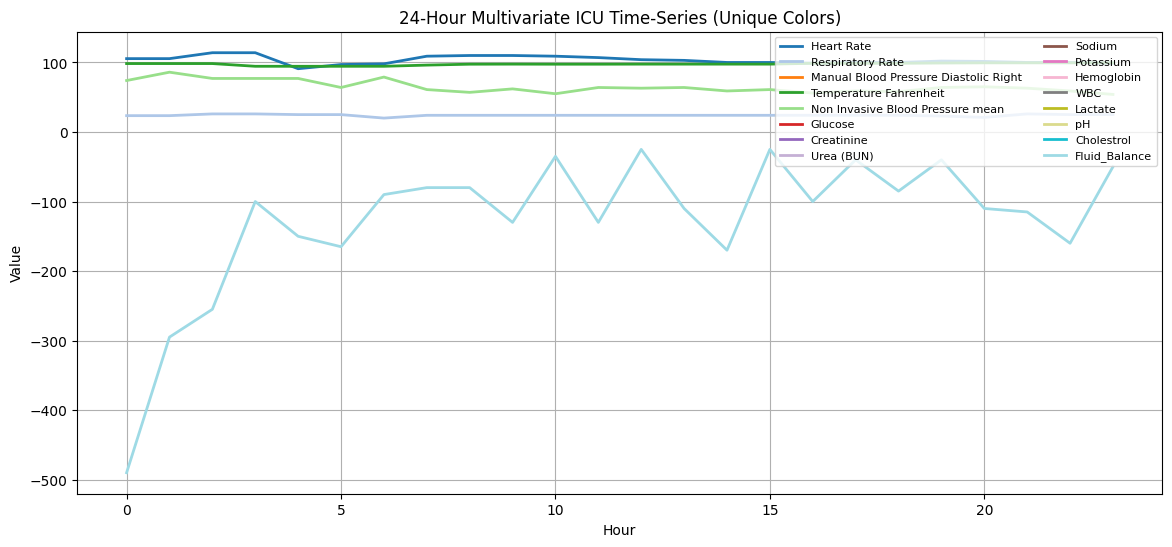

In [204]:
# visualizing one stay
import matplotlib.pyplot as plt
import numpy as np

sample = combined[0]
num_features = sample.shape[1]

# Generate unique colors
colors = plt.cm.tab20(np.linspace(0, 1, num_features))
# If features > 20, use:
# colors = plt.cm.hsv(np.linspace(0, 1, num_features))

plt.figure(figsize=(14,6))

for i, name in enumerate(feature_names_combined):
    plt.plot(sample[:, i], color=colors[i], label=name, linewidth=2)

plt.title("24-Hour Multivariate ICU Time-Series (Unique Colors)")
plt.xlabel("Hour")
plt.ylabel("Value")
plt.legend(loc='upper right', fontsize=8, ncol=2)
plt.grid(True)
plt.show()

     

key takeaways:
-> The wide Y-axis range is mainly due to fluid balance having much larger values than vitals or labs.
-> Negative fluid balance reflects net fluid loss during the ICU stay.

In [206]:
inputevents = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\inputevents.csv",parse_dates=["starttime", "endtime", "storetime"])


In [207]:
icustays = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\icustays.csv",parse_dates=["intime", "outtime"])

In [208]:
stay_to_intime = dict(zip(icustays["stay_id"], icustays["intime"]))
stay_to_hadm   = dict(zip(icustays["stay_id"], icustays["hadm_id"]))


In [209]:

med_classes = {
    "Vasopressors": [
        221906,  # Norepinephrine
        221289,  # Epinephrine
        221749,  # Phenylephrine
        221662   # Dopamine
    ],

    "Sedatives": [
        221744,  # Propofol
        221668,  # Midazolam
        222168   # Dexmedetomidine
    ],

    "Antibiotics": [
        225798,  # Vancomycin
        225943,  # Piperacillin-Tazobactam
        225845,  # Ceftriaxone
        225857   # Meropenem
    ],

    "Insulin": [
        223257,  # Insulin (Regular)
        223258   # Insulin (IV)
    ]
}


In [210]:
# Medication Extraction Function:
def extract_meds_24h(stay_id):
    intime = stay_to_intime.get(stay_id)

    # Safety check
    if pd.isna(intime):
        return np.zeros((24, len(med_classes)), dtype=np.float32)

    start = intime
    end   = intime + pd.Timedelta(hours=24)

    # Filter events
    df = inputevents[
        (inputevents["stay_id"] == stay_id) &
        (inputevents["starttime"] >= start) &
        (inputevents["starttime"] < end)
    ].copy()

    # Hour bins
    hours = pd.date_range(start=start.floor("h"), periods=24, freq="h")
    meds_ts = pd.DataFrame(0, index=hours, columns=med_classes.keys())

    if df.empty:
        return meds_ts.values.astype(np.float32)

    # Populate indicators
    for med_class, itemids in med_classes.items():
        mask = df["itemid"].isin(itemids)
        times = df.loc[mask, "starttime"]

        for t in times:
            h = t.floor("h")
            if h in meds_ts.index:
                meds_ts.loc[h, med_class] = 1

    return meds_ts.values.astype(np.float32)




In [211]:
med_timeseries = []

for stay_id in stay_ids_prev:
    meds_24h = extract_meds_24h(stay_id)
    med_timeseries.append(meds_24h)

med_timeseries = np.stack(med_timeseries)

print("Medication tensor shape:", med_timeseries.shape)


Medication tensor shape: (140, 24, 4)


In [212]:
i = 0  # any index
print("Stay ID:", stay_ids_prev[i])

df_check = pd.DataFrame(
    med_timeseries[i],
    columns=med_classes.keys()
)

print(df_check.sum())

Stay ID: 32604416
Vasopressors    1.0
Sedatives       3.0
Antibiotics     4.0
Insulin         9.0
dtype: float32


In [92]:
print("final_ids length:", len(final_ids))
print("combined shape:", combined.shape)

final_ids length: 139
combined shape: (139, 24, 16)


In [213]:
med_array = []

for sid in final_ids:

    if sid in med_timeseries:
        meds_24 = med_timeseries[sid].values.astype(np.float32)  # (24, 4)
    else:
        meds_24 = np.zeros((24, 4), dtype=np.float32)

    med_array.append(meds_24)

med_array = np.stack(med_array)

print("Medication array shape:", med_array.shape)

Medication array shape: (139, 24, 4)


In [214]:
dataset = np.concatenate(
    [combined, med_array],
    axis=2
)

print(" dataset shape:", dataset.shape)


 dataset shape: (139, 24, 20)


In [215]:
icu_stays_full = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\icustays.csv",parse_dates=["intime", "outtime"])

In [216]:

# merge the features
demo = icu_stays_full.merge(
    patients[["subject_id", "gender", "anchor_age"]],
    on="subject_id",
    how="left"
)

In [217]:
# encode and map
demo["gender"] = demo["gender"].map({"M": 1, "F": 0})
demo["age"] = demo["anchor_age"]

stay_to_demo = demo.set_index("stay_id")[["age", "gender"]].to_dict("index")


In [218]:
age_gender_array = []

for sid in final_ids:
    if sid in stay_to_demo:
        age = stay_to_demo[sid]["age"]
        gen = stay_to_demo[sid]["gender"]
    else:
        age, gen = 0, 0

    ag = np.tile([age, gen], (24, 1))
    age_gender_array.append(ag)

age_gender_array = np.stack(age_gender_array)

print(age_gender_array.shape)


(139, 24, 2)


In [219]:
final_dataset = np.concatenate(
    [dataset, age_gender_array],
    axis=2
)

print("Final dataset shape:", final_dataset.shape)

Final dataset shape: (139, 24, 22)


In [220]:
feature_names_final = (
    feature_names_combined + list(med_classes.keys()) + ["Age", "Gender"]
)

pd.DataFrame(feature_names_final, columns=["feature"]).to_csv(
    "feature_names_final.csv", index=False
)

In [221]:
np.save("final_dynamic_dataset.npy", final_dataset)


In [222]:
print(len(final_ids))
print(combined.shape)
print(med_array.shape)
print(final_dataset.shape)

139
(139, 24, 16)
(139, 24, 4)
(139, 24, 22)


In [223]:
print("Number of feature names:", len(feature_names_final))
print("Feature names:")
for i, name in enumerate(feature_names_final):
    print(i, name)


Number of feature names: 22
Feature names:
0 Heart Rate
1 Respiratory Rate
2 Manual Blood Pressure Diastolic Right
3 Temperature Fahrenheit
4 Non Invasive Blood Pressure mean
5 Glucose
6 Creatinine
7 Urea (BUN)
8 Sodium
9 Potassium
10 Hemoglobin
11 WBC
12 Lactate
13 pH
14 Cholestrol
15 Fluid_Balance
16 Vasopressors
17 Sedatives
18 Antibiotics
19 Insulin
20 Age
21 Gender


In [224]:
admissions = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\admissions.csv")


In [225]:
icustays = pd.read_csv(r"C:\Users\mouni\OneDrive\Desktop\AINUTRICARE\Data\Raw_data\icustays.csv")

In [226]:
# Inspect Admissions Table
admissions.head()


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [227]:
# Keep Required Columns Only
admissions = admissions[
    ["hadm_id", "hospital_expire_flag"]
]


In [228]:
# Merge ICU stays with Admissions
icu_stays = icustays[["stay_id", "hadm_id"]]

icu_labels = icu_stays.merge(
    admissions,
    on="hadm_id",
    how="left"
)


In [229]:
# Check Label Distribution
icu_labels["hospital_expire_flag"].value_counts()


hospital_expire_flag
0    120
1     20
Name: count, dtype: int64

Key Takeaway:
-> 0 = majority (survivors)
-> 1 = minority (deaths)

In [238]:
# Load Final Time-Series Dataset
X = np.load("final_dynamic_dataset.npy")  # shape (139, 24, 21)
print(X.shape)

(139, 24, 22)


In [239]:
final_ids
print(len(final_ids))


139


In [240]:
# Create Label Vector y
label_map = dict(
    zip(
        icu_labels["stay_id"],
        icu_labels["hospital_expire_flag"]
    )
)

In [241]:
y = np.array(
    [label_map[sid] for sid in final_ids],
    dtype=np.int64
)


In [242]:
# Verify X–y Alignment
print(X.shape)
print(y.shape)


(139, 24, 22)
(139,)


In [243]:
# Inspect Sample Label
i = 5
print("Stay ID:", final_ids[i])
print("Label (0=alive, 1=dead):", y[i])


Stay ID: 32506122
Label (0=alive, 1=dead): 0


In [250]:
# Save Final ML Dataset
np.save("X_timeseries.npy", X)
np.save("y_labels.npy", y)


In [251]:
final = np.load("final_dynamic_dataset.npy")
final[138]


array([[ 97.        ,  20.        ,          nan,  98.09999847,
         87.        ,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan, -60.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         72.        ,   0.        ],
       [ 95.        ,  13.        ,          nan,  98.09999847,
         92.        ,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan, -15.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         72.        ,   0.        ],
       [ 91.5       ,  15.        ,          nan,  98.09999847,
         73.        ,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan, -30.        ,
          0.        ,   0.    

In [252]:
df_sample = pd.DataFrame(final[138], columns=feature_names_final)
df_sample.head()
     


,Heart Rate,Respiratory Rate,Manual Blood Pressure Diastolic Right,Temperature Fahrenheit,Non Invasive Blood Pressure mean,Glucose,Creatinine,Urea (BUN),Sodium,Potassium,...,Lactate,pH,Cholestrol,Fluid_Balance,Vasopressors,Sedatives,Antibiotics,Insulin,Age,Gender
0,97.0,20.0,NaN,98.099998,87.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-60.0,0.0,0.0,0.0,0.0,72.0,0.0
1,95.0,13.0,NaN,98.099998,92.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-15.0,0.0,0.0,0.0,0.0,72.0,0.0
2,91.5,15.0,NaN,98.099998,73.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-30.0,0.0,0.0,0.0,0.0,72.0,0.0
3,89.0,16.0,NaN,98.099998,67.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-40.0,0.0,0.0,0.0,0.0,72.0,0.0
4,87.0,14.0,NaN,98.099998,76.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-40.0,0.0,0.0,0.0,0.0,72.0,0.0
